# Übung 1

**Aufgabe 1:** Berechnen Sie für die Variablen Groesse und Gewicht aus dem
Datensatz Schueler.txt die Varianz-Kovarianzmatrix

$Cov(Groesse, Gewicht) = \begin{pmatrix}
\sigma_1^2 & \tau\\
\tau & \sigma_2^2\\
\end{pmatrix}$

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

schueler = pd.read_csv('Schueler.txt', sep=' ')

print(schueler)


    lnr  Klasse Gesch  Alter  Groesse  Gewicht  Mathe  Physik  Deutsch  Bio
0     1       6     w     12      124       42      3     NaN        2    3
1     2       5     w     12      146       39      4     NaN        2    2
2     3      10     w     17      174       64      4     3.0        5    2
3     4       8     w     15      138       53      5     6.0        4    3
4     5       8     w     15      147       56      5     4.0        3    2
5     6       9     m     16      162       65      2     2.0        4    2
6     7       6     w     14      141       49      2     NaN        2    3
7     8      10     w     16      166       60      5     5.0        1    3
8     9       6     w     13      152       44      4     NaN        2    2
9    10       5     w     12      151       39      5     NaN        4    4
10   11       6     w     13      154       46      2     NaN        2    1
11   12       5     w     12      163       41      1     NaN        5    1
12   13     

In [40]:
matrix_selection = schueler[['Groesse', 'Gewicht']]

cov_matrix = np.cov(matrix_selection, rowvar=False)

print(cov_matrix)

[[187.32333333  84.025     ]
 [ 84.025       85.66666667]]


**Aufgabe 2:** Die Varianz-Kovarianzmatrix W für die Variablen Alter und
Groesse aus dem Datensatz Schueler.txt ist nach Rundung auf zwei Stellen
hinter den Komma

$W = \begin{pmatrix}
3.17 & 15.64\\
15.64 & 177.28\\
\end{pmatrix}$

Berechnen Sie die Eigenvektoren und die zugehörigen Eigenwerte von $W$. Runden Sie das Ergebnis wieder auf zwei Stellen hinter dem Komma.
Hinweis: Sie können die R-Funktion ```eigen``` benutzen.

In [41]:
w = np.array([[3.17, 15.64],
             [15.64, 177.28]])
eigenvalues, eigenvectors = np.linalg.eig(w)

eigenvalues, eigenvectors = np.round(eigenvalues, 2), np.round(eigenvectors, 2)

print(eigenvalues)
print(eigenvectors)

[  1.78 178.67]
[[-1.   -0.09]
 [ 0.09 -1.  ]]


**Aufgabe 5:** Seien $Z_1$ und $Z_2$ zwei unabhängige normalverteilte Zufallsvariablen mit Erwartungswert 0 und Varianz 1. Seien
$X = 5 Z_1 + 8 Z_2$
$Y = Z_1 − 2 Z_2$

A Berechnen Sie die Varianz-Kovarianzmatrix V von X und Y.

*(Berechnung auf Papier).* Ergebnis:

$ V = \begin{bmatrix}
89 & -11 \\
-11 & 5 \\
\end{bmatrix}$

B Korrelation

*(Berechnung auf Papier)*

$r = -0.52$

C Erzeugen Sie eine Stichprobe von $n = 1000$ Paaren $(X_i, Y_i)$, $i = 1, . . . , 1000$
von Zufallszahlen, die aus der gemeinsamen Verteilung von X und Y
stammen.
Hinweis: Erzeugen Sie mit rnorm zwei Vektoren mit jeweils 1000 standardnormalverteilten Zufallszahlen. Benutzen Sie dann die X und Y de-
finierenden Gleichungen $X = 5Z_1 + 8Z_2$ und $Y = Z_1 − 2Z_2$ .

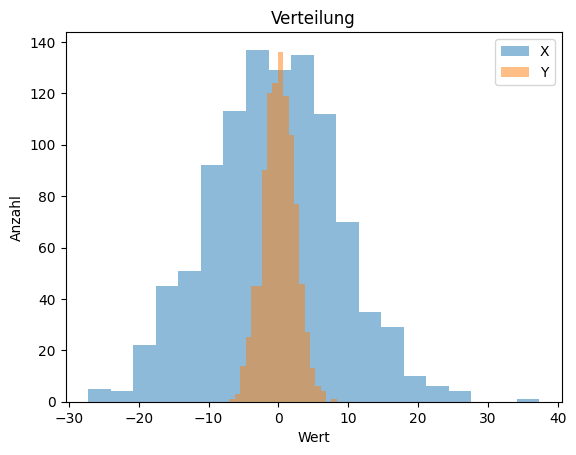

In [42]:
mean = 0
var = 1
std_dev = 1 # sqrt(var)

sample_z = np.random.normal(loc=mean, scale=std_dev, size=1000)
sample_zz = np.random.normal(loc=mean, scale=std_dev, size=1000)

x = 5*sample_z + 8*sample_zz
y = sample_z - 2*sample_zz


plt.hist(x, bins=20, alpha=0.5, label=f'X')
plt.hist(y, bins=20, alpha=0.5, label=f'Y')


plt.xlabel('Wert')
plt.ylabel('Anzahl')
plt.title('Verteilung')
plt.legend()

plt.show()

D Berechnen Sie für die Stichprobe $(X_i, Y_i), i = 1, . . . , 1000$ von Zufallszahlen die empirische Varianz-Kovarianzmatrix und vergleichen Sie diese Matrix mit $V$

In [43]:
cov_matrix = np.cov(x, y)

print(cov_matrix)

[[ 84.3797224  -10.85663926]
 [-10.85663926   5.07241315]]


Die Matrix stimmt sehr gut mit $V$ überein

E Erstellen Sie einen Konturplot der gemeinsamen Verteilung von $X$ und
$Y$ und zeichnen Sie die Paare $(X_i, Y_i), i = 1, . . . , 1000$ von Zufallszahlen
in den Konturplot ein.

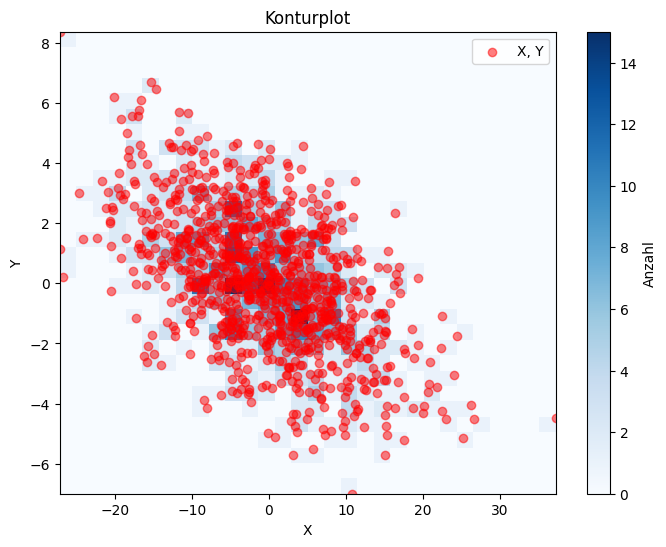

In [44]:
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar(label='Anzahl')

plt.scatter(x, y, color='red', alpha=0.5, label='X, Y')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Konturplot')
plt.legend()

plt.show()